In [309]:
import pandas as pd
import seaborn as sns                                                                                     
import matplotlib.pyplot as plt

In [310]:
sns.set_theme(style="darkgrid")
sns.set_palette("rocket_r")

In [311]:
results = pd.read_csv("benchmark_results.csv")
results.head()

,node_count,leaf_count,types_count,process_length,flow_likelihood,flow_duration,bdmm_likelihood,bdmm_duration,use_inverse_flow,use_random_initial_matrix,num_intervals
0,41,21,3,5.152341,-89.606153,46850583,-89.606151,12313375,True,True,1
1,231,116,8,5.068911,-792.684804,257622917,-792.684803,51961958,True,False,4
2,3,2,9,0.942585,-5.644824,3386334,-5.644824,772209,True,True,4
3,3,2,6,1.338772,-9.247855,836042,-9.247855,300667,True,True,1
4,5,3,4,1.609978,-8.173192,500500,-8.173191,421959,True,True,1


In [312]:
results = results[results["leaf_count"] > 10]
results["speedup"] = results["bdmm_duration"] / results["flow_duration"]
results["binned_leaves"] = results["leaf_count"].apply(lambda x: x // 200 * 200)

In [313]:
vanilla_flow = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == False)]
random_initial = results[(results["use_inverse_flow"] == False) & (results["use_random_initial_matrix"] == True)]
inverse_flow = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == False)]
inverse_flow_random_initial = results[(results["use_inverse_flow"] == True) & (results["use_random_initial_matrix"] == True)]

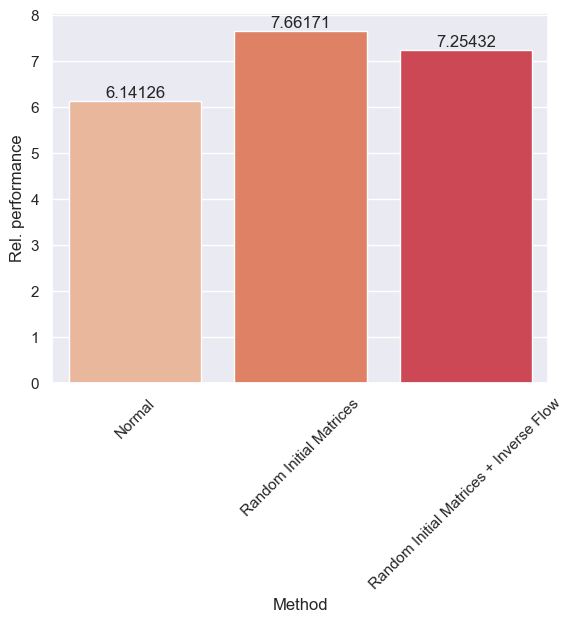

In [314]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow["speedup"].mean(),
        random_initial["speedup"].mean(),
        inverse_flow_random_initial["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)

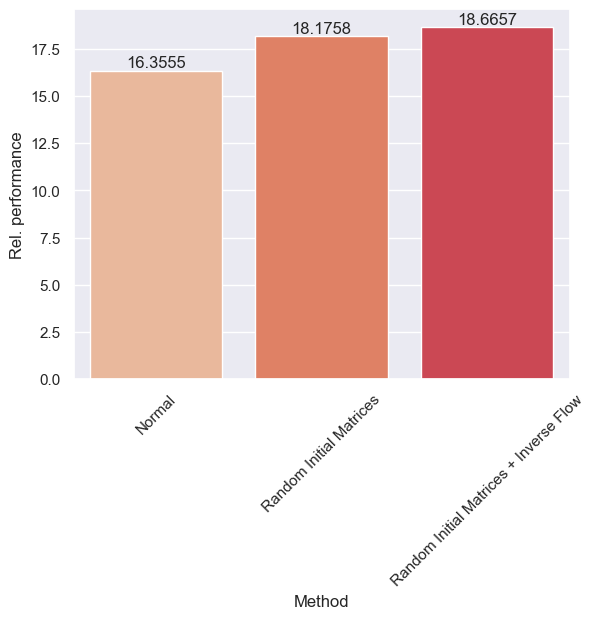

In [315]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        vanilla_flow[vanilla_flow["leaf_count"] > 500]["speedup"].mean(),
        random_initial[random_initial["leaf_count"] > 500]["speedup"].mean(),
        inverse_flow_random_initial[inverse_flow_random_initial["leaf_count"] > 500]["speedup"].mean(),
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

Text(0, 0.5, 'BDMM Log Likelihood')

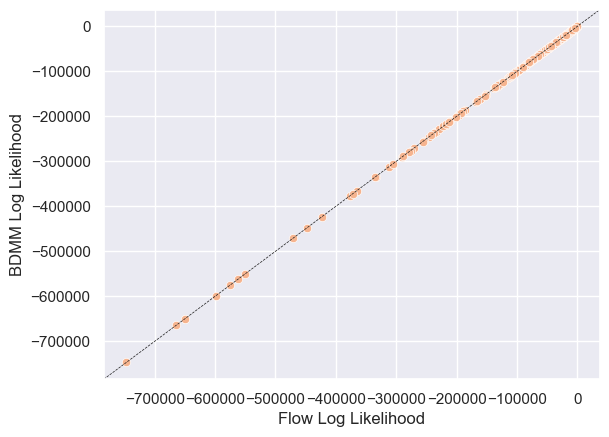

In [316]:
ax = sns.scatterplot(results, x="flow_likelihood", y="bdmm_likelihood")
ax.plot(ax.get_xlim(), ax.get_xlim(), linestyle='--', color='k', lw=0.5, scalex=False, scaley=False)

plt.xlabel('Flow Log Likelihood')
plt.ylabel('BDMM Log Likelihood')

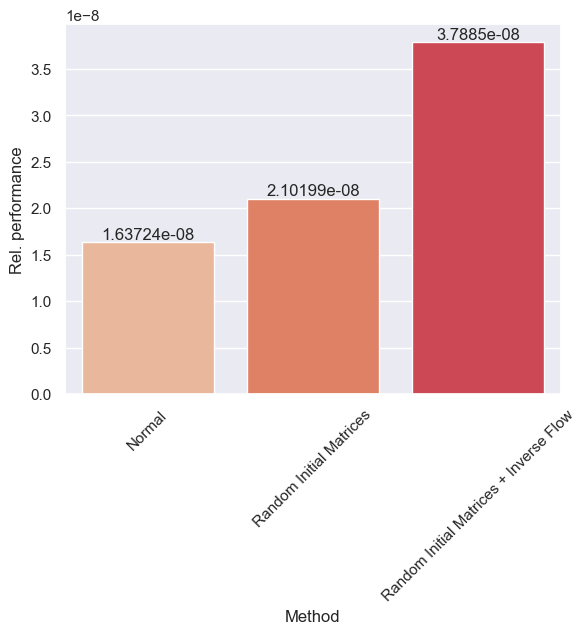

In [317]:
ax = sns.barplot(data=pd.DataFrame({
    "Method": [
        "Normal", 
        "Random Initial Matrices",
        "Random Initial Matrices + Inverse Flow",
    ],
    "Rel. performance": [
        ((vanilla_flow["bdmm_likelihood"] - vanilla_flow["flow_likelihood"]) / vanilla_flow["bdmm_likelihood"]).abs().mean(),
        ((random_initial["bdmm_likelihood"] - random_initial["flow_likelihood"]) / random_initial["bdmm_likelihood"]).abs().mean(),
        ((inverse_flow_random_initial["bdmm_likelihood"] - inverse_flow_random_initial["flow_likelihood"]) / inverse_flow_random_initial["bdmm_likelihood"]).abs().mean(), 
    ]
}), x="Method", y="Rel. performance")

plt.xticks(rotation=45)

for i in ax.containers:
    ax.bar_label(i,)

/var/folders/f_/r0jt4c1153v7d286lm9gbgx80000gn/T/ipykernel_14411/2149055440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_results["algorithm"] = relevant_results.apply(lambda row: f'{row["use_inverse_flow"]}_{row["use_random_initial_matrix"]}', axis=1)


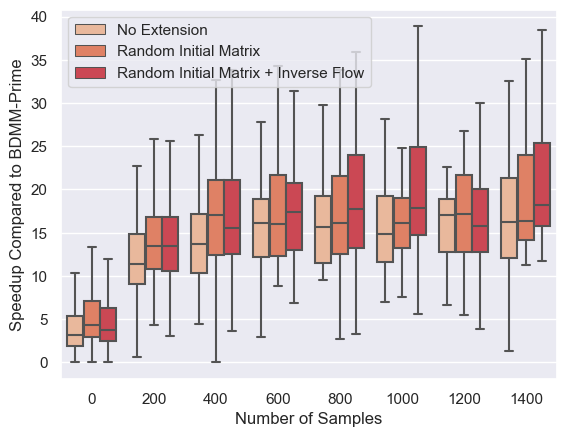

In [327]:
relevant_results = results[
    (results.use_inverse_flow & results.use_random_initial_matrix) |
    (~results.use_inverse_flow & results.use_random_initial_matrix) | 
    (~results.use_inverse_flow & ~results.use_random_initial_matrix)
]

relevant_results["algorithm"] = relevant_results.apply(lambda row: f'{row["use_inverse_flow"]}_{row["use_random_initial_matrix"]}', axis=1)
relevant_results = relevant_results.sort_values(by="algorithm")

ax = sns.boxplot(
    relevant_results[(relevant_results.binned_leaves < 1600)],
    x="binned_leaves", y="speedup", hue="algorithm",
    showfliers=False
)

ax.legend_.set_title(None)
ax.legend_.texts[0].set_text("No Extension")
ax.legend_.texts[1].set_text("Random Initial Matrix")
ax.legend_.texts[2].set_text("Random Initial Matrix + Inverse Flow")

plt.xlabel('Number of Samples')
plt.ylabel('Speedup Compared to BDMM-Prime')

plt.savefig("speedup_vs_sample_count.png", bbox_inches="tight", dpi=600)

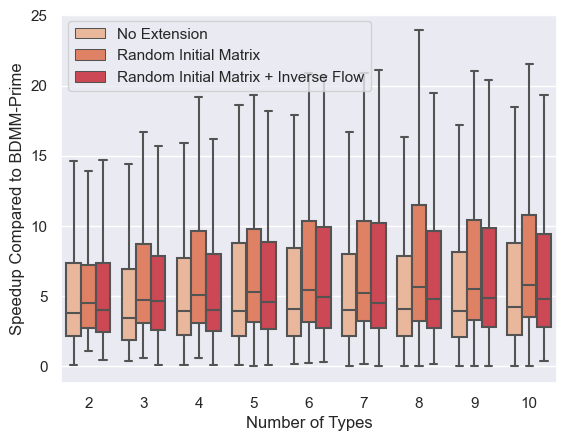

In [328]:
ax = sns.boxplot(
    relevant_results,
    x="types_count", y="speedup", hue="algorithm",
    showfliers=False
)

ax.legend_.set_title(None)
ax.legend_.texts[0].set_text("No Extension")
ax.legend_.texts[1].set_text("Random Initial Matrix")
ax.legend_.texts[2].set_text("Random Initial Matrix + Inverse Flow")

plt.xlabel('Number of Types')
plt.ylabel('Speedup Compared to BDMM-Prime')

plt.savefig("speedup_vs_type_count.png", bbox_inches="tight", dpi=600)